In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
import plotly.express as px
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [7]:
# Import necessary libraries
#import Train Data
data_path = "/Users/Rihannat/Downloads/Train (1).csv"
df = pd.read_csv(data_path)
df.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,30921,49,1,2,105,220,1,1,195,1,1.0,1,2,3,1
1,73128,29,1,0,160,180,0,2,198,0,6.0,2,1,0,1
2,45328,46,1,2,115,131,1,2,125,1,2.3,0,0,0,1
3,67372,41,1,2,161,454,1,2,159,1,3.5,2,4,0,1
4,41642,57,1,3,129,277,0,1,80,0,5.6,0,2,0,0


In [9]:
df.shape

(7087, 15)

In [10]:
#checking for null valve
df.isnull().sum()

id          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
#checking for each column datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7087 entries, 0 to 7086
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        7087 non-null   int64  
 1   age       7087 non-null   int64  
 2   sex       7087 non-null   int64  
 3   cp        7087 non-null   int64  
 4   trestbps  7087 non-null   int64  
 5   chol      7087 non-null   int64  
 6   fbs       7087 non-null   int64  
 7   restecg   7087 non-null   int64  
 8   thalach   7087 non-null   int64  
 9   exang     7087 non-null   int64  
 10  oldpeak   7087 non-null   float64
 11  slope     7087 non-null   int64  
 12  ca        7087 non-null   int64  
 13  thal      7087 non-null   int64  
 14  target    7087 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 830.6 KB


In [12]:
#checking for duplicate
df_duplicate = df.duplicated()
print(df_duplicate.sum())
df[df_duplicate]

0


,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [13]:
df.describe()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000
mean,50520.455341,53.161987,0.498660,1.511923,147.749259,343.852265,0.499365,1.011006,136.083251,0.500494,3.126556,0.995485,2.023705,1.496402,0.811486
std,23091.461196,14.217069,0.500033,1.118239,31.019531,127.795534,0.500035,0.816595,38.022627,0.500035,1.784760,0.817175,1.411018,1.118296,0.391150
min,10019.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30629.000000,41.000000,0.000000,1.000000,121.000000,231.000000,0.000000,0.000000,103.000000,0.000000,1.600000,0.000000,1.000000,0.000000,1.000000
50%,50872.000000,53.000000,0.000000,2.000000,148.000000,344.000000,0.000000,1.000000,136.000000,1.000000,3.100000,1.000000,2.000000,1.000000,1.000000
75%,70511.000000,66.000000,1.000000,3.000000,175.000000,453.000000,1.000000,2.000000,169.000000,1.000000,4.700000,2.000000,3.000000,2.000000,1.000000
max,89991.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
#skew distribution for column
numerical_column = ['age','trestbps','chol','thalach']
skewness = df[numerical_column].skew()
print(skewness)

age        -0.022097
trestbps   -0.043581
chol        0.007225
thalach     0.004638
dtype: float64


C:\Users\Rihannat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rihannat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rihannat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rihannat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

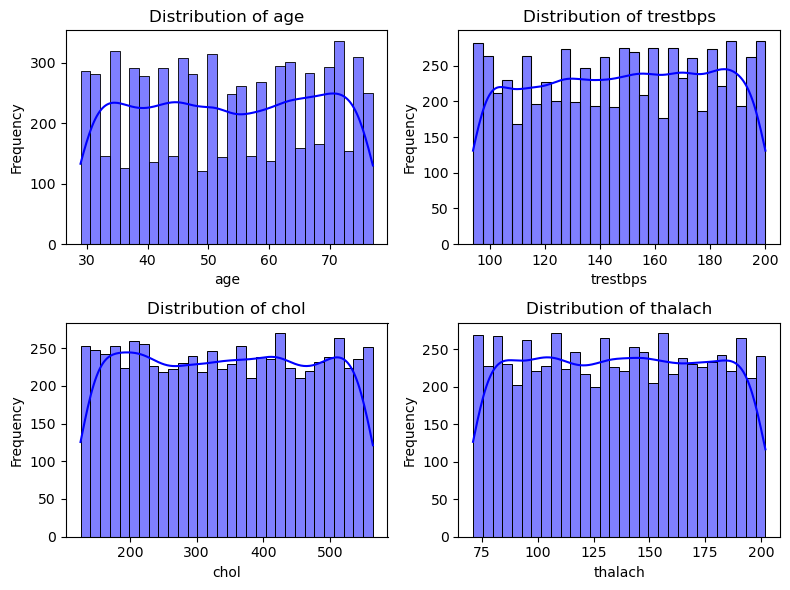

In [15]:
#skew distribution visualization
plt.figure(figsize= (8,6))
for i, col in enumerate(numerical_column,1):
    plt.subplot(2,2,i)
    sns.histplot(df[col], kde = True,bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show

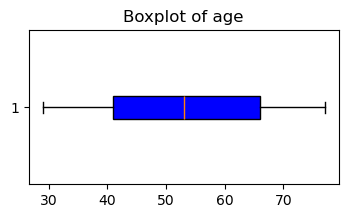

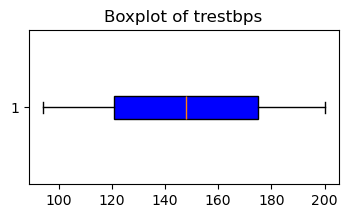

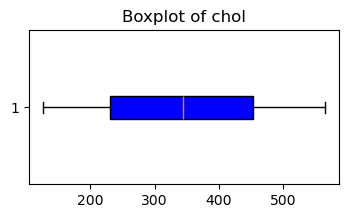

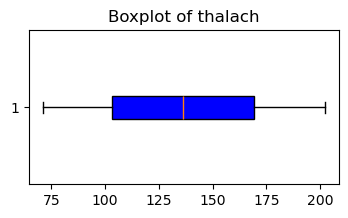

In [16]:
#Checking for outliers using boxplot
for col in ['age','trestbps','chol','thalach']:
    plt.figure(figsize=(4,2))
    plt.boxplot(df[col],vert=False,patch_artist=True,boxprops=dict(facecolor='blue',color='black'))
    plt.title(f"Boxplot of {col}")
    plt.show()

In [17]:
#Checking for outliers using z_scores method
z_scores = df[['age','trestbps','chol','thalach']].apply(zscore)
print((z_scores.abs() > 3).sum())

age         0
trestbps    0
chol        0
thalach     0
dtype: int64


In [18]:
#correlation
correlation = df.corr()
correlation

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
id,1.000000,-0.021279,0.002804,0.003040,0.007664,0.013666,0.019204,0.014709,-0.026461,0.003543,-0.016567,0.014747,0.020116,-0.008111,-0.020383
age,-0.021279,1.000000,-0.000327,-0.011697,-0.022024,0.002289,-0.000462,-0.010000,0.007868,-0.004398,-0.003299,0.010218,0.008799,0.007679,0.001990
sex,0.002804,-0.000327,1.000000,-0.010887,0.014904,0.006045,-0.010022,0.002801,0.003109,0.019898,-0.000830,-0.008994,-0.000755,-0.005372,0.021797
cp,0.003040,-0.011697,-0.010887,1.000000,0.014206,-0.003902,-0.016833,-0.001844,0.002954,0.002576,0.004268,-0.002721,-0.008139,-0.012746,-0.193608
trestbps,0.007664,-0.022024,0.014904,0.014206,1.000000,-0.014301,0.009375,0.005268,-0.005648,0.006591,0.014140,-0.003736,0.000349,0.006058,0.012341
chol,0.013666,0.002289,0.006045,-0.003902,-0.014301,1.000000,0.018502,0.001352,-0.012085,0.001228,-0.013285,-0.015671,0.003871,0.014858,-0.000876
fbs,0.019204,-0.000462,-0.010022,-0.016833,0.009375,0.018502,1.000000,0.001400,0.013942,0.005504,0.011563,0.008627,-0.003779,-0.002717,0.005160
restecg,0.014709,-0.010000,0.002801,-0.001844,0.005268,0.001352,0.001400,1.000000,-0.021578,-0.002087,0.001542,0.011706,0.014716,-0.004902,0.004288
thalach,-0.026461,0.007868,0.003109,0.002954,-0.005648,-0.012085,0.013942,-0.021578,1.000000,0.021033,-0.003179,-0.012914,0.013652,0.001378,0.006426
exang,0.003543,-0.004398,0.019898,0.002576,0.006591,0.001228,0.005504,-0.002087,0.021033,1.000000,0.014929,-0.000340,0.005784,0.018994,0.482459


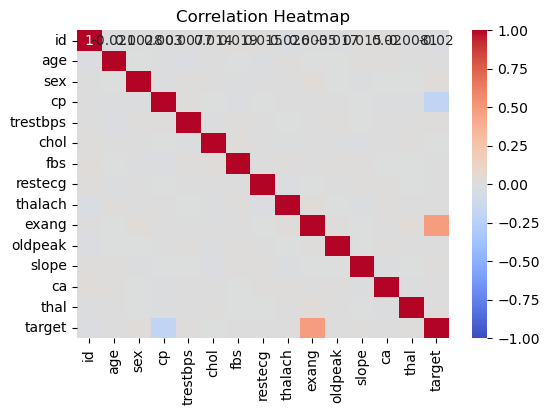

In [19]:
#correlation visulization
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [20]:
#droping target column for train data
X_train = df.drop('target',axis=1)
Y_train = df['target']

In [18]:
X_train.shape

(7087, 14)

In [21]:
Y_train.shape

(7087,)

In [23]:
#scaling train data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_train_scaled = pd.DataFrame(x_train_scaled, columns=X_train.columns)
x_train_scaled.head

<bound method NDFrame.head of             id       age       sex        cp  trestbps      chol       fbs  \
0    -0.848835 -0.292766  1.002685  0.436500 -1.378237 -0.969212  1.001271   
1     0.979113 -1.699625  1.002685 -1.352153  0.394964 -1.282234 -0.998731   
2    -0.224881 -0.503795  1.002685  0.436500 -1.055837 -1.665686  1.001271   
3     0.729825 -0.855510  1.002685  0.436500  0.427204  0.861967  1.001271   
4    -0.384518  0.269977  1.002685  1.330827 -0.604477 -0.523156 -0.998731   
...        ...       ...       ...       ...       ...       ...       ...   
7082  1.002456  0.199634 -0.997323 -0.457827  0.975285  0.173318 -0.998731   
7083  0.432985 -0.785167 -0.997323  0.436500  0.459444 -0.155355 -0.998731   
7084 -0.819774  0.129291 -0.997323 -1.352153  1.458885 -0.546633 -0.998731   
7085 -1.360359 -1.699625  1.002685 -0.457827  0.169284 -0.570109  1.001271   
7086 -0.228085  0.199634 -0.997323  0.436500  0.975285 -1.446571  1.001271   

       restecg   thalach     exan

In [24]:
X_train.shape

(7087, 14)

In [25]:
x_train_scaled.shape

(7087, 14)

In [26]:
# Split the data into training and valable sets
#splitting data into training and valable set
x_train, x_val, y_train, y_val = train_test_split(x_train_scaled, Y_train, test_size=0.2, random_state=42)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((5669, 14), (1418, 14), (5669,), (1418,))

In [27]:
#create and train logistic model
#logic  = make_classification(n_samples = 1000,n_features = 10,n_informative = 5)
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [28]:
#predicting val data using logistic model
predict = model.predict(x_val)
print(predict)

[1 1 1 ... 1 1 1]


In [30]:
#checking for accuracy
accuracy = accuracy_score(y_val, predict)
print("Accuracy:",accuracy_score(y_val,predict))
print("Classification Report:")
print(classification_report(y_val,predict))

Accuracy: 0.8159379407616361
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.34      0.39       251
           1       0.87      0.92      0.89      1167

    accuracy                           0.82      1418
   macro avg       0.67      0.63      0.64      1418
weighted avg       0.80      0.82      0.80      1418



In [31]:
#create and train randomforestregressor model
rf_model = RandomForestRegressor(random_state= 42, n_estimators=700, max_depth= 10)
rf_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=700, random_state=42)

In [32]:
#predicting val data using randomforestregressor model
rf_pred = rf_model.predict(x_val)
print(rf_pred)

[1.         0.42078922 1.         ... 1.         1.         1.        ]


In [33]:
#checking for accuracy
mean_val = np.sqrt(mean_squared_error(rf_pred, y_val))
mean_val

0.3045103058683035

In [34]:
#checking for accuracy
r2_score(y_val, rf_pred)

0.36348026222815766

In [35]:
#create and train decisiontreeclassifier model
models = DecisionTreeClassifier()
models.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
#predicting val data using decisiontreeclassifier model
predict_train = models.predict(x_val)
print(predict_train)

[1 1 1 ... 1 1 1]


In [51]:
#checking for accuracy
accuracy_train = accuracy_score(y_val,predict_train)
print("Accuracy Decision Tree:",accuracy_train)
print("Classification Report:")
print(classification_report(y_val,predict_train))

Accuracy Decision Tree: 0.8110014104372355
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.47      0.47       251
           1       0.89      0.88      0.88      1167

    accuracy                           0.81      1418
   macro avg       0.68      0.68      0.68      1418
weighted avg       0.81      0.81      0.81      1418



In [38]:
#knowing parameter to tune for decisiontree model
print(models.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [39]:
#knowing parameter to tune for logistic model
print(model.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [40]:
# Coefficients and Odds Ratios for logistic model
coefficients = model.coef_[0]
odds_ratios = np.exp(coefficients)


# Display feature importance using coefficients and odds ratios
feature_importance = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
})
print("\nFeature Importance (Coefficient and Odds Ratio):")
print(feature_importance.sort_values(by='Coefficient',
                                     ascending=False))


Feature Importance (Coefficient and Odds Ratio):
     Feature  Coefficient  Odds Ratio
9      exang     3.535999   34.329277
2        sex     0.063637    1.065706
11     slope     0.052478    1.053879
12        ca     0.039702    1.040501
4   trestbps     0.032183    1.032706
6        fbs     0.025609    1.025940
7    restecg     0.024088    1.024381
10   oldpeak    -0.006926    0.993098
1        age    -0.009248    0.990795
13      thal    -0.025127    0.975186
5       chol    -0.032227    0.968287
8    thalach    -0.038920    0.961828
0         id    -0.060849    0.940966
3         cp    -0.708321    0.492470


In [41]:
# Recursive Feature Elimination (RFE)
rfe_model = LogisticRegression(max_iter=10000, solver='liblinear')
rfe = RFE(rfe_model, n_features_to_select=5)
rfe.fit(x_train, y_train)

rfe_features = x_train.columns[rfe.support_]
print("\nSelected Features by RFE:")
print(rfe_features)


Selected Features by RFE:
Index(['id', 'sex', 'cp', 'exang', 'slope'], dtype='object')


In [43]:
#Checking accuracy  for logistic model after feature importance
X_train_rfe = x_train[rfe_features]  
X_test_rfe = x_val[rfe_features]   

rfe_model.fit(X_train_rfe, y_train)

y_pred = rfe_model.predict(X_test_rfe)

accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:",accuracy_score(y_val,y_pred))
print("Classification Report:")
print(classification_report(y_val,y_pred))


Accuracy: 0.8138222849083215
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.32      0.38       251
           1       0.86      0.92      0.89      1167

    accuracy                           0.81      1418
   macro avg       0.66      0.62      0.63      1418
weighted avg       0.79      0.81      0.80      1418



In [44]:
#adjusting parameter grid
parameters = {'max_depth' : (10,30,50,70,90,100),
              'criterion' : ('gini','entropy'),
              'max_depth' : (3,5,7,9,10),
              'max_features' : ('auto', 'sqrt', 'log2'),
              'min_samples_split' : (2,4,6)
             }
              

In [45]:
# Create GridSearchCV
gridcv = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions = parameters, cv = 5, verbose = True)
# Fit the model
gridcv.fit(x_train,y_train)
                            

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Rihannat\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Rihannat\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Rihannat\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Rihannat\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.wa

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (3, 5, 7, 9, 10),
                                        'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'min_samples_split': (2, 4, 6)},
                   verbose=True)

In [47]:
# Using GridSearchCV best estimator
remodel = gridcv.best_estimator_

In [48]:
remodel = DecisionTreeClassifier(max_depth=10, max_features='log2', min_samples_split=6)
remodel.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, max_features='log2', min_samples_split=6)

In [49]:
# Predictions and accuracy
predict_remodel = remodel.predict(x_val)
print(predict_remodel)

[1 1 1 ... 1 1 1]


In [50]:
# Predictions and accuracy train data
accuracy_remodel = accuracy_score(y_val,predict_remodel)
print("Accuracy Decision Tree:",accuracy_train)

Accuracy Decision Tree: 0.8110014104372355


In [21]:
# Import necessary libraries
#import Test Data
data_path = "/Users/Rihannat/Downloads/Test Dataset.csv"
df_test = pd.read_csv(data_path)
df_test.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0
3,10409,37,0,1,178,287,0,1,192,1,5.7,1,0,0
4,17330,35,0,3,104,281,0,0,122,0,1.3,1,4,3


In [22]:
#scaling test data
scaler = StandardScaler()
x_test_scaled = scaler.fit_transform(df_test)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=df_test.columns)
x_test_scaled.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.540495,1.180311,1.022879,-1.352098,0.542359,1.186502,-0.994454,1.206332,0.885296,1.031263,-0.631450,-0.014106,-1.454633,-0.422556
1,-1.556510,0.553060,1.022879,-1.352098,-0.502201,-0.833280,-0.994454,1.206332,-1.613872,1.031263,0.971054,1.213152,-0.023089,0.469874
2,-0.225672,-0.004496,1.022879,-1.352098,-1.677331,1.681623,1.005577,-0.026046,-1.639905,1.031263,-1.349814,-0.014106,-0.738861,-1.314986
3,-1.568628,-1.119610,-0.977632,-0.453255,1.031997,-0.448186,-0.994454,-0.026046,1.458022,1.031263,1.413124,-0.014106,-1.454633,-1.314986
4,0.827504,-1.258999,-0.977632,1.344433,-1.383549,-0.495340,-0.994454,-1.258424,-0.364288,-0.969684,-1.018261,-0.014106,1.408454,1.362304


In [255]:
test_predicts = remodel.predict(x_test_scaled)
print(test_predicts)

[1 1 1 ... 1 1 0]


In [256]:
# Load the submission Excel file
#file_path = 'path_to_existing_file.xlsx'  # Replace with your actual file path
data_path = "/Users/Rihannat/Downloads/Sample Submission.csv"
df = pd.read_csv(data_path)



#'trarget' is the name of the empty column where you need to insert predictions
df['target'] = test_predicts  # Replace 'Target' with the actual column name

# Save the updated DataFrame back to the Excel file
df.to_csv('Heart disease prediction.csv', index=False)

In [ ]:
submission = pd.Dataframe({
    'id':x_test_scaled['id'],
    'target':test_predict
}
                         )
submission.to_csv('Heart prediction.csv',index=False)